In [1]:
#wine
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, KFold, cross_validate, train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

from sklearn import tree
import graphviz

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
import warnings
warnings.filterwarnings('ignore')

#load data
df = pd.read_csv (r'./data/wine.csv')

#preprocessing
# convert target to binary
df.loc[df.quality =='bad', "quality"] = 0 #bad wine
df.loc[df.quality == 'good', "quality"] = 1 #good wine
#get the target
y = df.pop('quality')
#scale features
X_scaled = preprocessing.scale(df)

#split train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

## RBF KERNEL

In [2]:
#grid search to find best paramteres
params = {'C': [0.001, 0.01, 0.1, 1, 10,50,100,200,300]
          , 'gamma': [0.001, 0.01, 0.1, 1,5,10]
        }
grid_search_cv = GridSearchCV(SVC(kernel='rbf',
                                random_state=42)
                              , params
                              , scoring = "accuracy"
                              , verbose=1
                              , cv=5
                              ,n_jobs=5)
grid_search_cv.fit(X_train, y_train);

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    5.1s
[Parallel(n_jobs=5)]: Done 261 out of 270 | elapsed:   10.7s remaining:    0.4s
[Parallel(n_jobs=5)]: Done 270 out of 270 | elapsed:   10.9s finished


In [3]:
print("Best estimators: ", grid_search_cv.best_estimator_)

Best estimators:  SVC(C=50, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)


In [4]:
#model with default features
print("SVM with default params accuracy: ", cross_val_score(SVC(kernel='rbf',random_state=42), X_train, y_train, cv=5, scoring='accuracy').mean())
print("SVM with tuned hyper paramaters accuracy: ", cross_val_score(grid_search_cv.best_estimator_, X_train, y_train, cv=5, scoring='accuracy').mean())

SVM with default params accuracy:  0.7560539215686275
SVM with tuned hyper paramaters accuracy:  0.7584007352941177


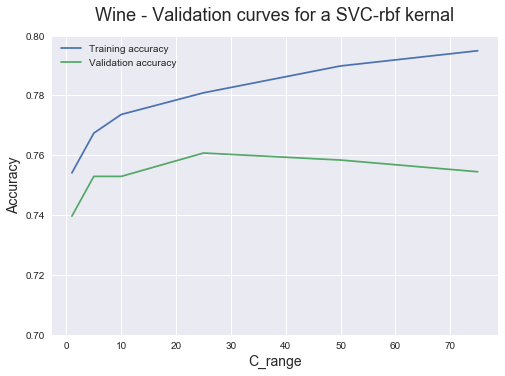

In [5]:
#plot validation curve for C-reg parameter The strength of the regularization is inversely proportional to C.
c_range = [1,5,10,25,50,75]
train_scores, valid_scores = validation_curve(SVC(C=50, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False),
                                              X_train,
                                              y_train,
                                              param_name = "C",
                                              param_range = c_range,
                                              scoring='accuracy',
                                             cv=5)

plt.style.use('seaborn')
plt.plot(c_range, train_scores.mean(axis=1), label = 'Training accuracy')
plt.plot(c_range, valid_scores.mean(axis=1), label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('C_range', fontsize = 14)
plt.title('Wine - Validation curves for a SVC-rbf kernal', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.7,0.8)
plt.show()

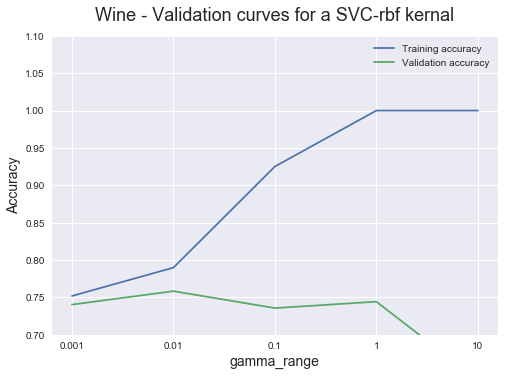

In [6]:
#plot validation curve for C-reg parameter The strength of the regularization is inversely proportional to C.
gamma_range = [0.001,0.01,0.1,1,10]
train_scores, valid_scores = validation_curve(SVC(C=50, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False),
                                              X_train,
                                              y_train,
                                              param_name = "gamma",
                                              param_range = gamma_range,
                                              scoring='accuracy',
                                             cv=5)

plt.style.use('seaborn')
gamma_range = ['0.001','0.01','0.1','1','10']
plt.plot(gamma_range, train_scores.mean(axis=1), label = 'Training accuracy')
plt.plot(gamma_range, valid_scores.mean(axis=1), label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('gamma_range', fontsize = 14)
plt.title('Wine - Validation curves for a SVC-rbf kernal', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.7,1.1)
plt.show()

In [7]:
svm_wine =SVC(C=25, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

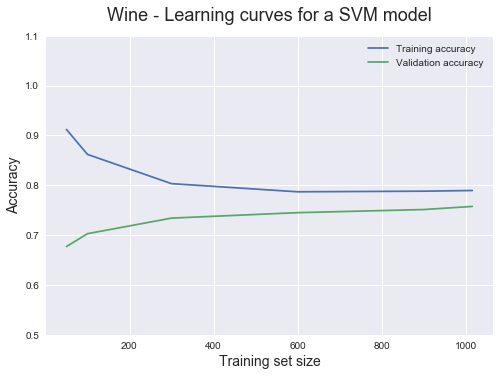

In [8]:
#learning curve with tree_depth=3

train_sizes = [1,50, 100, 300, 600, 900, 1016]

train_sizes, train_scores, validation_scores = learning_curve(
               estimator = grid_search_cv.best_estimator_,
               X = X_train,
               y = y_train,
               train_sizes = train_sizes,
               cv = 5,
               scoring = 'accuracy')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
#print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
#print('\n', '-' * 20) # separator
#print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))


plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Wine - Learning curves for a SVM model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.5,1.1)
plt.show()

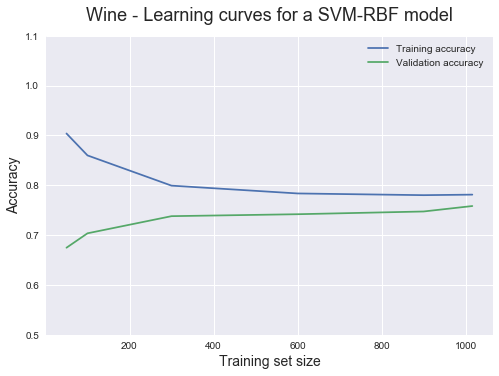

In [9]:
#learning curve with tree_depth=3

train_sizes = [1,50, 100, 300, 600, 900, 1016]

train_sizes, train_scores, validation_scores = learning_curve(
               estimator = svm_wine, #grid_search_cv.best_estimator_,
               X = X_train,
               y = y_train,
               train_sizes = train_sizes,
               cv = 5,
               scoring = 'accuracy')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
#print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
#print('\n', '-' * 20) # separator
#print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))


plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Wine - Learning curves for a SVM-RBF model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.5,1.1)
plt.show()

In [10]:
#model with default features
print("SVM with default params accuracy: ", cross_val_score(SVC(kernel='rbf'), X_train, y_train, cv=5, scoring='accuracy').mean())
print("SVM with tuned hyper paramaters accuracy: ", cross_val_score(grid_search_cv.best_estimator_, X_train, y_train, cv=5, scoring='accuracy').mean())
print("SVM with LC params accuracy: ", cross_val_score(svm_wine, X_train, y_train, cv=5, scoring='accuracy').mean())

SVM with default params accuracy:  0.7560539215686275
SVM with tuned hyper paramaters accuracy:  0.7584007352941177
SVM with LC params accuracy:  0.7607567401960784


In [11]:
#diabetes
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, KFold, cross_validate, train_test_split
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

from sklearn import tree
import graphviz

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import BorderlineSMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC

#load data
df = pd.read_csv (r'./data/diabetes.csv')

#preprocessing
# convert target to binary
df.loc[df["class"] =='tested_negative', "class"] = 0
df.loc[df["class"] == 'tested_positive', "class"] = 1

#get the target
y = df.pop('class')
#scale features
X_scaled = preprocessing.scale(df)

oversample = BorderlineSMOTE(random_state=42)
X_scaled, y = oversample.fit_resample(X_scaled, y)


#split train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

#decision tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

#plot tree(hide for now)
#tree.plot_tree(clf);

#save tree as pdf
#diabetes_data = tree.export_graphviz(clf, out_file=None)
#graph = graphviz.Source(diabetes_data)
#graph.render("diabetes")

#grid search to find best paramteres
params = {'C': [0.001, 0.01, 0.1, 1, 10,50,100,200,300]
          , 'gamma': [0.001, 0.01, 0.1, 1,5,10]
        }
grid_search_cv = GridSearchCV(SVC(kernel='rbf',
                                random_state=42)
                              , params
                              , scoring = "f1"
                              , verbose=1
                              , cv=5
                              ,n_jobs=5)
grid_search_cv.fit(X_train, y_train);


#best estimators
print("Best estimators: ", grid_search_cv.best_estimator_)

#model with default features
print("SVM-RBF with default params F1: ", cross_val_score(SVC(kernel='rbf',random_state=42), X_train, y_train, cv=5, scoring='f1').mean())

print('\n', '-' * 20) # separator

#model with perf tuned hyperparameters
print("SVM-RBF with tuned hyper paramaters: ", cross_val_score(grid_search_cv.best_estimator_, X_train, y_train, cv=5, scoring='f1').mean())



Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    1.1s
[Parallel(n_jobs=5)]: Done 270 out of 270 | elapsed:    3.7s finished


Best estimators:  SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
SVM-RBF with default params F1:  0.7653714699215952

 --------------------
SVM-RBF with tuned hyper paramaters:  0.8036075689725978


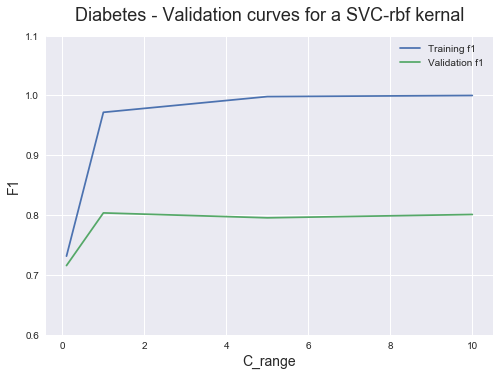

In [12]:
#plot validation curve for C-reg parameter The strength of the regularization is inversely proportional to C.
c_range = [0.1,1,5,10]
train_scores, valid_scores = validation_curve(SVC(kernel='rbf',random_state=42,gamma=1),
                                              X_train,
                                              y_train,
                                              param_name = "C",
                                              param_range = c_range,
                                              scoring='f1',
                                             cv=5)

plt.style.use('seaborn')
plt.plot(c_range, train_scores.mean(axis=1), label = 'Training f1')
plt.plot(c_range, valid_scores.mean(axis=1), label = 'Validation f1')
plt.ylabel('F1', fontsize = 14)
plt.xlabel('C_range', fontsize = 14)
plt.title('Diabetes - Validation curves for a SVC-rbf kernal', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.6,1.1)
plt.show()

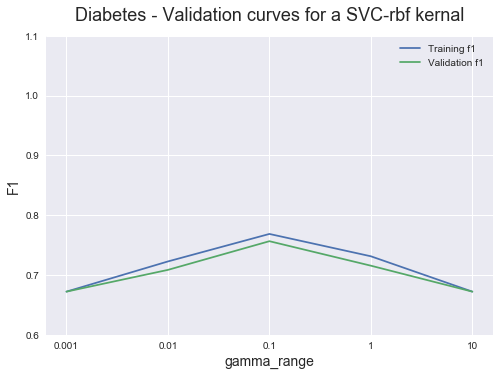

In [13]:
#plot validation curve for C-reg parameter The strength of the regularization is inversely proportional to C.
gamma_range = [0.001,0.01,0.1,1,10]
train_scores, valid_scores = validation_curve(SVC(kernel='rbf',random_state=42,C=0.1),
                                              X_train,
                                              y_train,
                                              param_name = "gamma",
                                              param_range = gamma_range,
                                              scoring='f1',
                                             cv=5)

plt.style.use('seaborn')
gamma_range = ['0.001','0.01','0.1','1','10']
plt.plot(gamma_range, train_scores.mean(axis=1), label = 'Training f1')
plt.plot(gamma_range, valid_scores.mean(axis=1), label = 'Validation f1')
plt.ylabel('F1', fontsize = 14)
plt.xlabel('gamma_range', fontsize = 14)
plt.title('Diabetes - Validation curves for a SVC-rbf kernal', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.6,1.1)
plt.show()

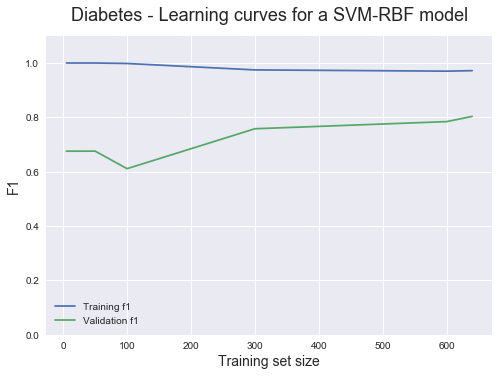

In [14]:
#learning curve

train_sizes = [5,50, 100, 300, 600, 640]

train_sizes, train_scores, validation_scores = learning_curve(
               estimator = grid_search_cv.best_estimator_,
               X = X_train,
               y = y_train,
               train_sizes = train_sizes,
               cv = 5,
               scoring = 'f1')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
#print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
#print('\n', '-' * 20) # separator
#print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))


plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training f1')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation f1')
plt.ylabel('F1', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Diabetes - Learning curves for a SVM-RBF model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.0,1.1)
plt.show()

In [15]:
svm_rbf = SVC(C=1, kernel='rbf',random_state=42,gamma=0.1)

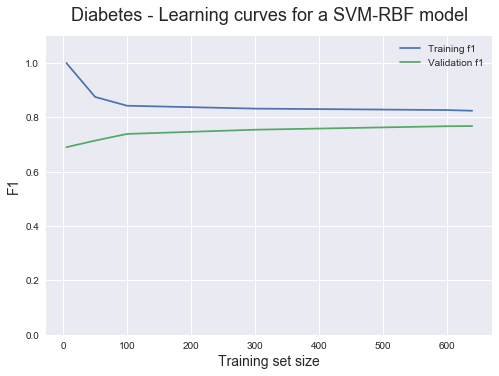

In [16]:
#learning curve

train_sizes = [5,50, 100, 300, 600, 640]

train_sizes, train_scores, validation_scores = learning_curve(
               estimator = svm_rbf,#grid_search_cv.best_estimator_,
               X = X_train,
               y = y_train,
               train_sizes = train_sizes,
               cv = 5,
               scoring = 'f1')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
#print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
#print('\n', '-' * 20) # separator
#print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))


plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training f1')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation f1')
plt.ylabel('F1', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Diabetes - Learning curves for a SVM-RBF model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.0,1.1)
plt.show()

In [17]:
#model with default features
print("SVM-RBF with default params F1: ", cross_val_score(SVC(kernel='rbf',random_state=42), X_train, y_train, cv=5, scoring='f1').mean())
print("SVM-RBF with tuned hyper paramaters F1: ", cross_val_score(grid_search_cv.best_estimator_, X_train, y_train, cv=5, scoring='f1').mean())
print("SVM-RBF with LC params F1: ", cross_val_score(svm_rbf, X_train, y_train, cv=5, scoring='f1').mean())

SVM-RBF with default params F1:  0.7653714699215952
SVM-RBF with tuned hyper paramaters F1:  0.8036075689725978
SVM-RBF with LC params F1:  0.7680911505346393


## LINEAR KERNEL

In [18]:
#wine
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, KFold, cross_validate, train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

from sklearn import tree
import graphviz

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC

#load data
df = pd.read_csv (r'./data/wine.csv')

#preprocessing
# convert target to binary
df.loc[df.quality =='bad', "quality"] = 0 #bad wine
df.loc[df.quality == 'good', "quality"] = 1 #good wine
#get the target
y = df.pop('quality')
#scale features
X_scaled = preprocessing.scale(df)

#split train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
#grid search to find best paramteres
params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,50,100,200,300,500],
        'loss' : ['hinge', 'squared_hinge']
         }
grid_search_cv = GridSearchCV(LinearSVC(random_state=42)
                              , params
                              , scoring = "accuracy"
                              , verbose=1
                              , cv=5
                              ,n_jobs=5)
grid_search_cv.fit(X_train, y_train);

Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 110 out of 110 | elapsed:    2.7s finished


In [19]:
print("Best estimators: ", grid_search_cv.best_estimator_)

Best estimators:  LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=42, tol=0.0001, verbose=0)


In [20]:
#model with default features
print("SVM with default params accuracy: ", cross_val_score(LinearSVC(random_state=42), X_train, y_train, cv=5, scoring='accuracy').mean())
print("SVM with tuned hyper paramaters accuracy: ", cross_val_score(grid_search_cv.best_estimator_, X_train, y_train, cv=5, scoring='accuracy').mean())

SVM with default params accuracy:  0.7396354166666667
SVM with tuned hyper paramaters accuracy:  0.7419791666666666


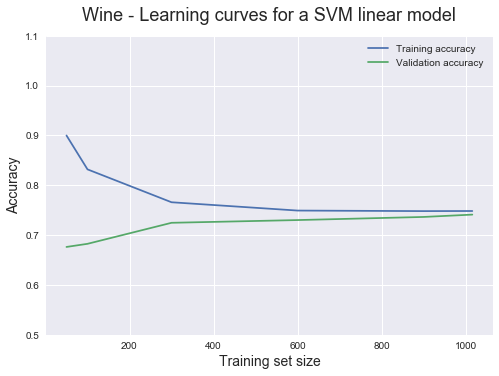

In [21]:
train_sizes = [1,50, 100, 300, 600, 900, 1016]

train_sizes, train_scores, validation_scores = learning_curve(
               estimator = grid_search_cv.best_estimator_,
               X = X_train,
               y = y_train,
               train_sizes = train_sizes,
               cv = 5,
               scoring = 'accuracy')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
#print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
#print('\n', '-' * 20) # separator
#print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))


plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Wine - Learning curves for a SVM linear model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.5,1.1)
plt.show()

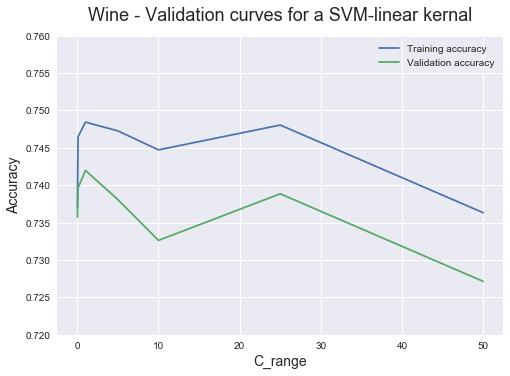

In [22]:
#plot validation curve for C-reg parameter The strength of the regularization is inversely proportional to C.
c_range = [0.01,0.1,1,5,10,25,50]
#gamma_range = [0.0001, 0.001,0.01,0.1]
train_scores, valid_scores = validation_curve(LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=42, tol=0.0001, verbose=0),
                                              X_train,
                                              y_train,
                                              param_name = "C",
                                              param_range = c_range,
                                              scoring='accuracy',
                                             cv=5)

plt.style.use('seaborn')
plt.plot(c_range, train_scores.mean(axis=1), label = 'Training accuracy')
plt.plot(c_range, valid_scores.mean(axis=1), label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('C_range', fontsize = 14)
plt.title('Wine - Validation curves for a SVM-linear kernal', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.72,0.76)
plt.show()

In [23]:
#diabetes
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, KFold, cross_validate, train_test_split
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

from sklearn import tree
import graphviz

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import BorderlineSMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC

#load data
df = pd.read_csv (r'./data/diabetes.csv')

#preprocessing
# convert target to binary
df.loc[df["class"] =='tested_negative', "class"] = 0
df.loc[df["class"] == 'tested_positive', "class"] = 1

#get the target
y = df.pop('class')
#scale features
X_scaled = preprocessing.scale(df)

oversample = BorderlineSMOTE(random_state=42)
X_scaled, y = oversample.fit_resample(X_scaled, y)


#split train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)



params = {'C': [0.0001, 0.001 ,0.01, 0.05, 0.1, 1, 10,50,100],
        'loss' : ['hinge', 'squared_hinge']
         }
grid_search_cv = GridSearchCV(LinearSVC(random_state=42)
                              , params
                              , scoring = "f1"
                              , verbose=1
                              , cv=5
                              ,n_jobs=5)
grid_search_cv.fit(X_train, y_train);


#best estimators
print("Best estimators: ", grid_search_cv.best_estimator_)

#model with default features
print("SVM-Linear with default params F1: ", cross_val_score(LinearSVC(random_state=42), X_train, y_train, cv=5, scoring='f1').mean())

print('\n', '-' * 20) # separator

#model with perf tuned hyperparameters
print("SVM-Linear with tuned hyper paramaters F1: ", cross_val_score(grid_search_cv.best_estimator_, X_train, y_train, cv=5, scoring='f1').mean())



Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  80 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done  90 out of  90 | elapsed:    0.7s finished


Best estimators:  LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=42, tol=0.0001, verbose=0)
SVM-Linear with default params F1:  0.7048410665859723

 --------------------
SVM-Linear with tuned hyper paramaters F1:  0.7292303088255829


In [24]:
print("Best estimators: ", grid_search_cv.best_estimator_)

Best estimators:  LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=42, tol=0.0001, verbose=0)


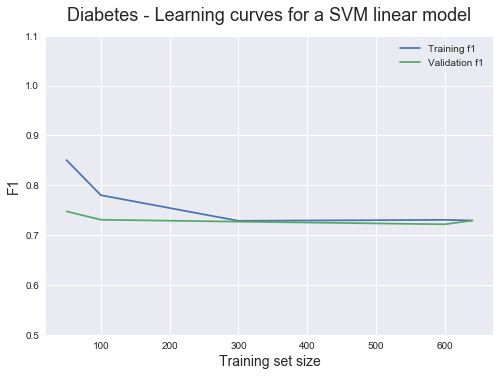

In [25]:
#learning curve with tree_depth=3

train_sizes = [1,50, 100, 300, 600, 640]

train_sizes, train_scores, validation_scores = learning_curve(
               estimator = grid_search_cv.best_estimator_,
               X = X_train,
               y = y_train,
               train_sizes = train_sizes,
               cv = 5,
               scoring = 'f1')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
#print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
#print('\n', '-' * 20) # separator
#print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))


plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training f1')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation f1')
plt.ylabel('F1', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Diabetes - Learning curves for a SVM linear model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.5,1.1)
plt.show()

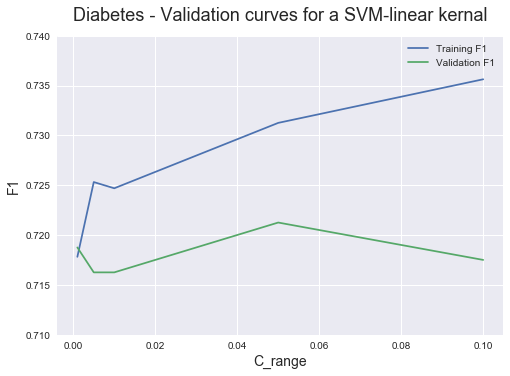

In [26]:
#plot validation curve for C-reg parameter The strength of the regularization is inversely proportional to C.
c_range = [0.001,0.005,0.01,0.05,0.1]
#gamma_range = [0.0001, 0.001,0.01]
train_scores, valid_scores = validation_curve(LinearSVC(class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=42, tol=0.0001, verbose=0),
                                              X_train,
                                              y_train,
                                              param_name = "C",
                                              param_range = c_range,
                                              scoring='accuracy',
                                             cv=5)

plt.style.use('seaborn')
plt.plot(c_range, train_scores.mean(axis=1), label = 'Training F1')
plt.plot(c_range, valid_scores.mean(axis=1), label = 'Validation F1')
plt.ylabel('F1', fontsize = 14)
plt.xlabel('C_range', fontsize = 14)
plt.title('Diabetes - Validation curves for a SVM-linear kernal', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.71,0.74)
plt.show()

In [27]:
lsvc_diab = LinearSVC(C = 0.05, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=42, tol=0.0001, verbose=0)

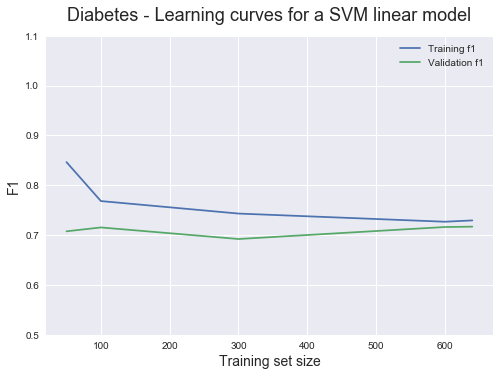

In [28]:
#learning curve with tree_depth=3

train_sizes = [1,50, 100, 300, 600, 640]

train_sizes, train_scores, validation_scores = learning_curve(
               estimator = lsvc_diab, #grid_search_cv.best_estimator_,
               X = X_train,
               y = y_train,
               train_sizes = train_sizes,
               cv = 5,
               scoring = 'f1')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
#print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
#print('\n', '-' * 20) # separator
#print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))


plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training f1')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation f1')
plt.ylabel('F1', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Diabetes - Learning curves for a SVM linear model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.5,1.1)
plt.show()

In [29]:
#model with default features
print("SVM with default params F1: ", cross_val_score(LinearSVC(random_state=42), X_train, y_train, cv=5, scoring='f1').mean())
print("SVM with tuned hyper paramaters F1: ", cross_val_score(grid_search_cv.best_estimator_, X_train, y_train, cv=5, scoring='f1').mean())
print("SVM with tuned LC paramaters F1: ", cross_val_score(lsvc_diab, X_train, y_train, cv=5, scoring='f1').mean())

SVM with default params F1:  0.7048410665859723
SVM with tuned hyper paramaters F1:  0.7292303088255829
SVM with tuned LC paramaters F1:  0.7170327595241166
